Example of approximating a noisey sin curve with local linear models 

In [23]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import sklearn.tree as tree

In [2]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

In [11]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2);
regr_2 = DecisionTreeRegressor(max_depth=3);
regr_1.fit(X, y);
regr_2.fit(X, y);

In [12]:
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

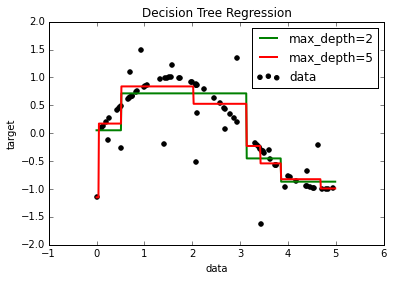

In [13]:
# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()

In [24]:
tree.export_graphviz(regr_2, out_file='./test_tree.dot')

In [28]:
!ls -ltrh

total 220
-rwx------  1 barnhatb  staff    24K Dec  9 12:04 Tree tutorial.ipynb
-rwx------  1 barnhatb  staff   1.3K Dec  9 12:05 test_tree.dot
-rwx------  1 barnhatb  staff    84K Dec  9 12:05 tree.png


In [27]:
! dot -Tpng test_tree.dot -o tree.png